# problem definition:

Predicting sale price of bulldozers given it's characterstics and previous data

# data:

Data is downloaded from the kaggle bluebook for bulldozers competition.
The data for this competition is split into three parts:

*Train.csv is the training set, which contains data through the end of 2011.

*Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

*Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# Evaluation:

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note:Goal for regression metric is to minimize the error .

# features:
 
 data dictionary is availabe here.
 
 

In [130]:
import pandas as pd
dd=pd.read_csv("Data Dictionary (4).csv")
dd

,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [131]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [132]:
df = pd.read_csv("TrainAndValid.csv")
df

C:\Users\Home\Desktop\sample_project1\heart_disease_project\env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [134]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [135]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

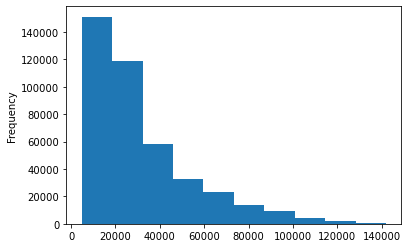

In [136]:
df['SalePrice'].plot.hist();

Since this a time series data , pay attention to time and date.

This can be done by telling pandas which columns are of dates using "parse_dates" parameter.


In [137]:
df.saledate.dtype,df.saledate

(dtype('O'),
 0         11/16/2006 0:00
 1          3/26/2004 0:00
 2          2/26/2004 0:00
 3          5/19/2011 0:00
 4          7/23/2009 0:00
                ...       
 412693      3/7/2012 0:00
 412694     1/28/2012 0:00
 412695     1/28/2012 0:00
 412696      3/7/2012 0:00
 412697     1/28/2012 0:00
 Name: saledate, Length: 412698, dtype: object)

In [138]:
#importing using parse dates
df=pd.read_csv("TrainAndValid.csv",parse_dates = ['saledate'],low_memory = False)

In [139]:
df.saledate.dtype,df.saledate

(dtype('<M8[ns]'),
 0        2006-11-16
 1        2004-03-26
 2        2004-02-26
 3        2011-05-19
 4        2009-07-23
             ...    
 412693   2012-03-07
 412694   2012-01-28
 412695   2012-01-28
 412696   2012-03-07
 412697   2012-01-28
 Name: saledate, Length: 412698, dtype: datetime64[ns])

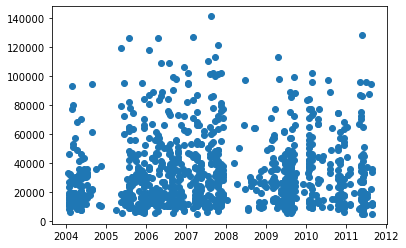

In [140]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [141]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [142]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

##### Sort the dataframe according to the date
##### This is an important step while solving timeseries data

In [143]:
df.sort_values(by = ['saledate'],inplace=True,ascending = True)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [145]:
### make a copy of original dataframe
df_cp = df.copy()

In [146]:
df_cp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [147]:
# we use the copy to experiment

# feature engineering

> creating a new feature, extracting a feature from raw data


### add datatime parameter for 'saledate ' column

In [148]:
df_cp['saleyear']=df_cp['saledate'].dt.year
df_cp['salemonth']=df_cp['saledate'].dt.month
df_cp['saleday']=df_cp['saledate'].dt.day
df_cp['saledayofweek']=df_cp['saledate'].dt.dayofweek
df_cp['saledayofyear']=df_cp['saledate'].dt.dayofyear

In [149]:
df_cp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [150]:
# since we enriched our dataframe with date time features , we can remove saledate

In [151]:
df_cp.drop('saledate',axis = 1,inplace=True)

In [152]:
df_cp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### converting strings to pandas category

https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html

In [153]:
#checking if usageband is a string

pd.api.types.is_string_dtype(df_cp['UsageBand'])

True

In [154]:
# loop to check string types 

for i,j in df_cp.items(): #treats our dataframe as a string
    if pd.api.types.is_string_dtype(j):
        print(i)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [155]:
# converting string values to categorical values 

for i,j in df_cp.items():
    if pd.api.types.is_string_dtype(j):
        df_cp[i]=j.astype("category").cat.as_ordered() #ordered too
        
        

In [156]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

Now the strings are converted to caterogical values and each categorical value has a code.
You can access them in this way :

In [157]:
df_cp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [158]:
#to check missing values in the form of ratios
df_cp.isna().sum() / len(df_cp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### filling numeric missing values

In [159]:
for i,j in df_cp.items():
    if pd.api.types.is_numeric_dtype(j):
        print(i)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [160]:
for i,j in df_cp.items():
    if pd.api.types.is_numeric_dtype(j):
        if pd.isnull(j).sum():
            print(i)

auctioneerID
MachineHoursCurrentMeter


In [161]:
# fill with median (median is more robust than mean)

for i,j in df_cp.items():
    if pd.api.types.is_numeric_dtype(j):
         if pd.isnull(j).sum():
            df_cp[i+"is_missing"]= pd.isnull(j)
            # adding a binary column at the end of dataframe which tells if a value was missing
            df_cp[i]=j.fillna(j.median()) #filling with median

In [162]:
# check if any null numeric values
for i,j in df_cp.items():
    if pd.api.types.is_numeric_dtype(j):
        if pd.isnull(j).sum():
            print(i)

In [163]:
# check the binary columns
df_cp['auctioneerIDis_missing'].value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [164]:
df_cp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleyear', 'salemonth',
       'saleday', 'saledayofweek', 'saledayofyear', 'auctioneerI

#### filling and turing categorical values to numbers

In [165]:
for i,j in  df_cp.items():
    if not pd.api.types.is_numeric_dtype(j):
        print(i)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [166]:
pd.Categorical(df_cp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [167]:
# turn categorical variables to numbers :
for i,j in df_cp.items():
    if not pd.api.types.is_numeric_dtype(j):
        #add binary column
        df_cp[i+"is_missing"]=pd.isnull(j)
        #conversion
        df_cp[i]=pd.Categorical(j).codes+1

In [168]:
# +1 is to eliminate -1 as -1 is assigned to all negative values as shown below 

pd.Categorical(df_cp['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [169]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [170]:
df_cp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


In [171]:
# now no missing values as missing values are assigned 0
df_cp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

# modelling

In [172]:
X = df_cp.drop('SalePrice',axis =1)
y = df_cp['SalePrice']

In [173]:
# creating our own validation set for timeseries data

df_cp['saleyear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [174]:
#split into training and validation 
df_val = df_cp[df_cp['saleyear']==2012]

In [175]:
df_train = df_cp[df_cp['saleyear']!=2012]

In [176]:
len(df_val),len(df_train)

(11573, 401125)

In [177]:
X_train , y_train = df_train.drop('SalePrice',axis = 1),df_train['SalePrice']

In [178]:
X_val , y_val = df_val.drop('SalePrice',axis = 1),df_val['SalePrice']

In [179]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

Creating evalation funtion 

In [180]:
#RMSLE to be used

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_preds,y_test):
    """ 
    Calculates RMSLE
    """ 
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


In [181]:
# function to evaluate on different levels 

def scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)
    score = {"training_mae":mean_absolute_error(y_train,train_preds),
              "valid_mae":mean_absolute_error(y_val,val_preds),
              "training_r2" :r2_score(y_train,train_preds),
              "valid_r2":r2_score(y_val,val_preds),
              "training_rmsle":rmsle(y_train,train_preds),
              "val_rmsle":rmsle(y_val,val_preds)}
    return score

# testing on a subset of data

In [182]:
%%time
# we test on a subset as we want to reduce time 

from sklearn.ensemble import RandomForestRegressor
#change max_samples (deafault is none , i.e all samples)
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples =10000)
model.fit(X_train,y_train)

Wall time: 56.6 s
Compiler : 278 ms


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [183]:
scores(model)

{'training_mae': 5561.2988092240585,
 'valid_mae': 7177.26365505919,
 'training_r2': 0.8606658995199189,
 'valid_r2': 0.8320374995090507,
 'training_rmsle': 0.257745378256977,
 'val_rmsle': 0.29362638671089003}

# improving hyperparameters

In [184]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_samples":[10000],
           "max_depth":[None, 3 ,5 ,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
            "max_features":[0.5,1,'sqrt','auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions =rf_grid,
                              n_iter= 3,
                              cv = 5,
                              verbose =True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 6min 12s
Parser   : 181 ms


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [185]:
rs_model.best_params_ , scores(rs_model)

({'n_estimators': 50,
  'min_samples_split': 16,
  'min_samples_leaf': 7,
  'max_samples': 10000,
  'max_features': 0.5,
  'max_depth': None},
 {'training_mae': 6259.288722534011,
  'valid_mae': 7613.186299327939,
  'training_r2': 0.8248853979354066,
  'valid_r2': 0.8096352716251376,
  'training_rmsle': 0.28284292509778175,
  'val_rmsle': 0.3071304607848309})

after 100 iterations.....

In [186]:
#most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators= 40,
                                     min_samples_split= 14,
                                     min_samples_leaf=1,
                                     max_samples= None,
                                     max_features= 0.5,
                                     n_jobs = -1,
                                     random_state = 42)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [187]:
#scores of ideal model trained of all data
scores(ideal_model)

{'training_mae': 2953.8161137163484,
 'valid_mae': 5951.247761444453,
 'training_r2': 0.9588145522577225,
 'valid_r2': 0.8818019502450094,
 'training_rmsle': 0.14469006962371858,
 'val_rmsle': 0.2452416398953833}

## Make predictions on test data

In [188]:
df_test = pd.read_csv("Test.csv",low_memory = False , parse_dates =['saledate'])

In [189]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### we must preprocess our test set too before predicting to make it in the same format as our training data

In [190]:
def preprocess(df):
    df['saleyear']=df['saledate'].dt.year
    df['salemonth']=df['saledate'].dt.month
    df['saleday']=df['saledate'].dt.day
    df['saledayofweek']=df['saledate'].dt.dayofweek
    df['saledayofyear']=df['saledate'].dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    #filling numeric rows
    
    for i,j in df.items():
        if pd.api.types.is_numeric_dtype(j):
             if pd.isnull(j).sum():
                df[i+"is_missing"]= pd.isnull(j)
            # adding a binary column at the end of dataframe which tells if a value was missing
                df[i]=j.fillna(j.median()) #filling with median
                
    #filling non numeric rows
    for i,j in df.items():
        if not pd.api.types.is_numeric_dtype(j):
            #add binary column
            df[i+"is_missing"]=pd.isnull(j)
            #conversion
            df[i]=pd.Categorical(j).codes+1
    
    return df

In [191]:
df_test = preprocess(df_test)

In [192]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [193]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [194]:
# we can find how the columns differ by using sets 
set(X_train.columns) - set( df_test.columns)

{'auctioneerIDis_missing'}

### Our test dataframe didnt have any auctioneer ID is missing, hence no column was created.
### So manually create it 

In [195]:
df_test['auctioneerIDis_missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [196]:
# We can make predictions now :3 :3

In [197]:
test_preds = ideal_model.predict(df_test)

C:\Users\Home\Desktop\sample_project1\heart_disease_project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [198]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [199]:
# formatting the predictions 

In [200]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [201]:
df_preds.to_csv("price_preds.csv",index = False)

In [202]:
# we can't evaluate as we don't have the ground true dataset of the test data

# feature importance

In [203]:
ideal_model.feature_importances_

# gives a value for every feature/column

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [204]:
# helper function for plotting feature importances

def features(columns , importances , n =20): #for top 20 values
    df = (pd.DataFrame({"features": columns,
                     "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importance'][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

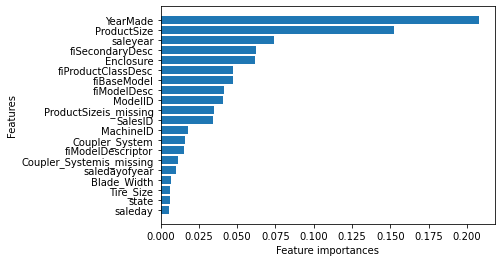

In [205]:
features(X_train.columns ,ideal_model.feature_importances_)

In [ ]:
np.mean(df_preds) 